# Exploratory Data Analysis using Python - A Case Study
*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

###  Steps use in this analysis
- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Introduction
In this tutorial, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.
We'll use the opendatasets helper library to download the files.

### opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


### To verify downloaded file 

In [4]:
import os
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

#### Let's load the CSV files using the Pandas library. We'll use the name survey_raw_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [5]:
import pandas as pd

In [6]:
survey = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [7]:
survey

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset constain 64000 rows and 61 columns.
The dataset constain 64000 response and 61 questions.
### Information about dataset of column

In [8]:
survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

#### Its not easily to look as in row ways. We can refer to the schema file to see the full text of each question (full form of question). The schema file contains only two columns: Column and QuestionText. We can load it as Pandas Series with Column as the index and the QuestionText as the value.

In [9]:
schema_pd = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema = pd.read_csv(schema_pd, index_col='Column').QuestionText
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [10]:
schema['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [11]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [12]:
schema['Hobbyist']
schema['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

#### Save and upload your notebook¶

In [13]:
# Select a project name
project='python-eda-stackoverflow-survey'
# Install the Jovian library
!pip install jovian --upgrade --quiet

In [14]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyasky/python-eda-stackoverflow-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyasky/python-eda-stackoverflow-survey


'https://jovian.com/shreyasky/python-eda-stackoverflow-survey'

## Data Preparation & Cleaning¶

Let's select a subset of columns with the relevant data for our analysis.

In [17]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt']

In [18]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame survey. We can continue to modify further without affecting the original data frame.

In [19]:
new_survey = survey[selected_columns].copy()

In [20]:
new_scheme = schema[selected_columns]

In [21]:
new_survey.shape

(64461, 20)

In [22]:
new_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Using objects allows for flexibility, as elements within the array or DataFrame can be of different types.
For example, you could have a mix of integers, strings, lists, or other objects within the same array or DataFrame.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), 
even though a few other columns have mostly numeric values. To make our analysis easier, 
let's convert some other columns into numeric data types while ignoring any non-numeric value.
The non-numeric are converted to NaN.

In [23]:
new_survey['Age1stCode']=pd.to_numeric(new_survey.Age1stCode,errors='coerce')
new_survey['YearsCode']=pd.to_numeric(new_survey.YearsCode,errors='coerce')
new_survey['YearsCodePro']=pd.to_numeric(new_survey.YearsCodePro,errors='coerce')

In [24]:
new_survey.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Now lets delete some column which affets that whole data like age and workweekhrs are not correct data 

In [25]:

new_survey.drop(new_survey[new_survey.Age <10].index,inplace=True)
new_survey.drop(new_survey[new_survey.Age >100].index,inplace=True)

In [26]:
new_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
new_survey.drop(new_survey[new_survey.WorkWeekHrs <100].index,inplace=True)

In [28]:
new_survey['Gender'].value_counts()

Man                                                            11637
Woman                                                           1124
Non-binary, genderqueer, or gender non-conforming                125
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [29]:
import numpy as np

In [30]:
new_survey.where(~(new_survey.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [31]:
new_survey.sample(10) 

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
3295,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,23.0,9.0,6.0,HTML/CSS;JavaScript,Haskell;HTML/CSS;JavaScript;Rust;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
44215,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38977,Slovenia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,HTML/CSS;JavaScript,Every few months,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
22238,Iran,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,20.0,9.0,NaN,Python;Rust;SQL,Bash/Shell/PowerShell;Java;Rust,Once a year,Visit Stack Overflow;Watch help / tutorial videos,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,Specific department or team I’d be working on;...,NaN,NaN
24749,Cuba,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,5.0,NaN,Dart;Java;JavaScript;Kotlin;Python,Dart;Python,Every few months,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Designer;Developer, full-stack;Developer, mobile",NaN,Slightly satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Fairly important
43975,Pakistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,7.0,1.0,Dart;Java;JavaScript,Dart,NaN,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, mobile",NaN,NaN,NaN,NaN,Fairly important
54597,Bangladesh,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,26.0,4.0,NaN,HTML/CSS,HTML/CSS;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN
41086,France,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17.0,8.0,2.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,Slightly dissatisfied,NaN,NaN,Very important
55954,United Kingdom,60.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,42.0,18.0,Go,Go,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,NaN,Fairly important
43283,Japan,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed part-time,Academic researcher,NaN,Slightly satisfied,NaN,NaN,Very important


In [32]:
new_survey['Gender'].value_counts()

Man                                                  11637
Woman                                                 1124
Non-binary, genderqueer, or gender non-conforming      125
Name: Gender, dtype: int64

In [33]:
import jovian 
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyasky/python-eda-stackoverflow-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyasky/python-eda-stackoverflow-survey


'https://jovian.com/shreyasky/python-eda-stackoverflow-survey'

### Exploratory Analysis and Visualization

In [34]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib.pyplot as plt: This imports the matplotlib.pyplot module, which provides a MATLAB-like plotting framework. The alias plt is a commonly used shorthand for pyplot.
# %matplotlib inline: This is a magic command for Jupyter Notebooks that allows the plots to be displayed inline within the notebook.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,5)
matplotlib.rcParams['figure.facecolor']='#FFFFFF'


## Country

In [35]:
new_scheme.Country

'Where do you live?'

In [36]:
new_survey.Country.nunique()

177

In [39]:
list_of_country = new_survey.Country.value_counts().head(15)
list_of_country

India                 4378
United States         3348
Germany               1190
United Kingdom         981
Canada                 690
France                 619
Brazil                 551
Pakistan               408
Netherlands            404
Nigeria                398
Poland                 373
Bangladesh             362
Russian Federation     352
Italy                  338
Turkey                 328
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

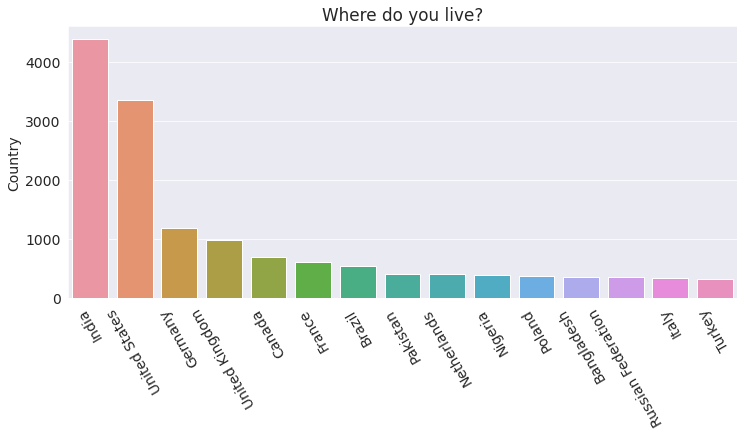

In [40]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=120)
plt.title(new_scheme.Country)
sns.barplot(x=list_of_country.index,y=list_of_country)

It appears that a disproportionately high number of respondents 
are from the India and US, probably because the survey is in English, and these
countries have the highest English-speaking populations.

In [41]:
# solve exercise after this

## Age

(array([ 205., 2119., 3776., 1675.,  872.,  574.,  368.,  263.,  158.,
         118.,   93.,   69.,   42.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

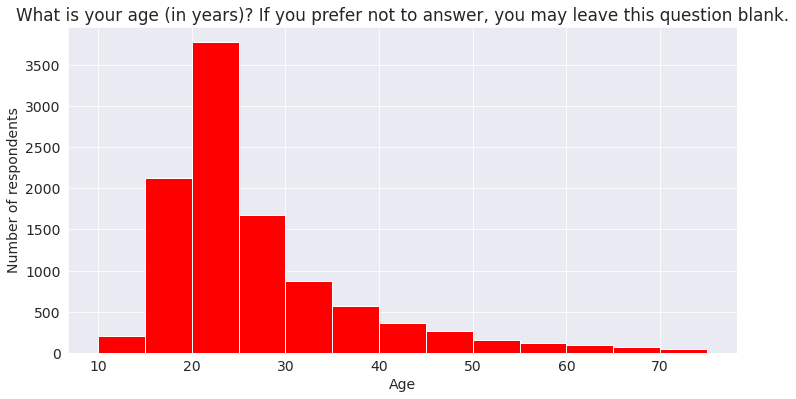

In [42]:
plt.figure(figsize=(12,6))
plt.title(new_scheme.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(new_survey.Age , bins=np.arange(10,80,5),color='red')

It appears that a large percentage of respondents are 20-45 years old.Many young people have taken up computer science as their field of study or profession in the last 20 years.

## Gender

In [43]:
gender_counts = new_survey.Gender.value_counts()
gender_counts

Man                                                  11637
Woman                                                 1124
Non-binary, genderqueer, or gender non-conforming      125
Name: Gender, dtype: int64

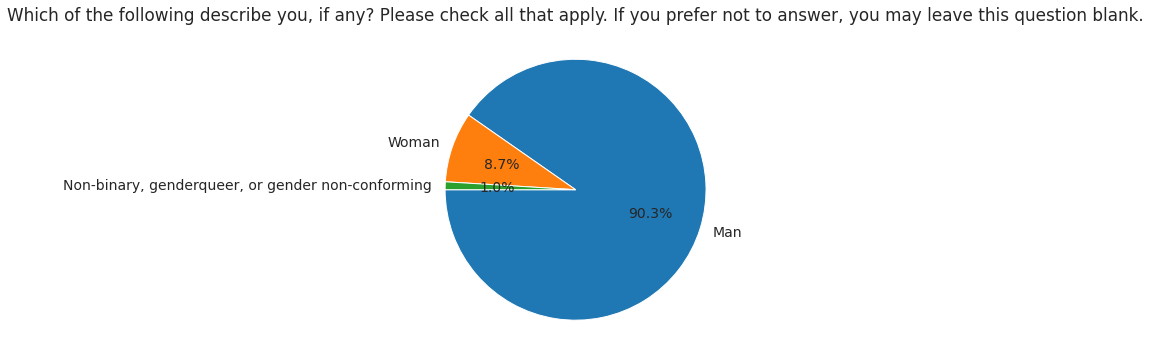

In [44]:
plt.figure(figsize=(12,6))
plt.title(new_scheme.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 10% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

In [45]:
import jovian 
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyasky/python-eda-stackoverflow-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyasky/python-eda-stackoverflow-survey


'https://jovian.com/shreyasky/python-eda-stackoverflow-survey'

## Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming.
Let's compare the eduation level of programmer

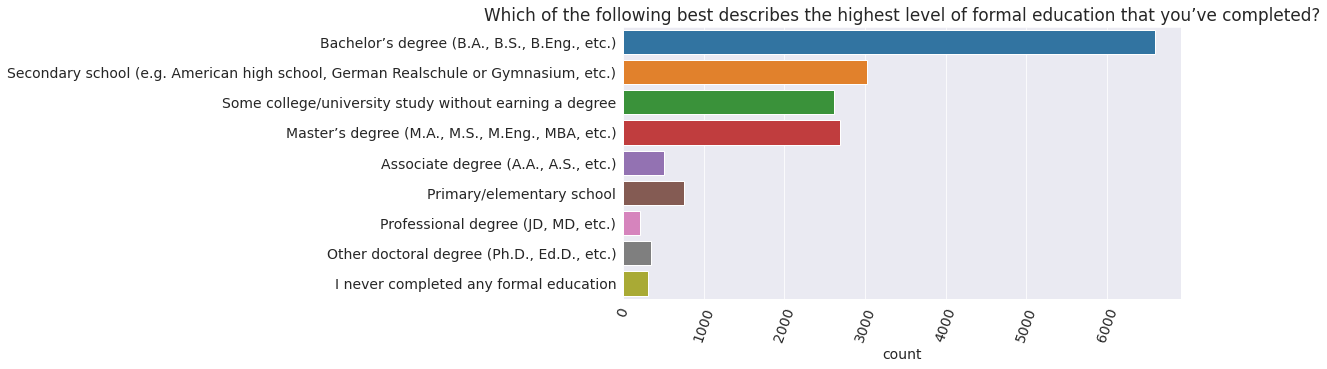

In [46]:
sns.countplot(y=new_survey.EdLevel)
plt.xticks(rotation=70);
plt.title(new_scheme['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education.

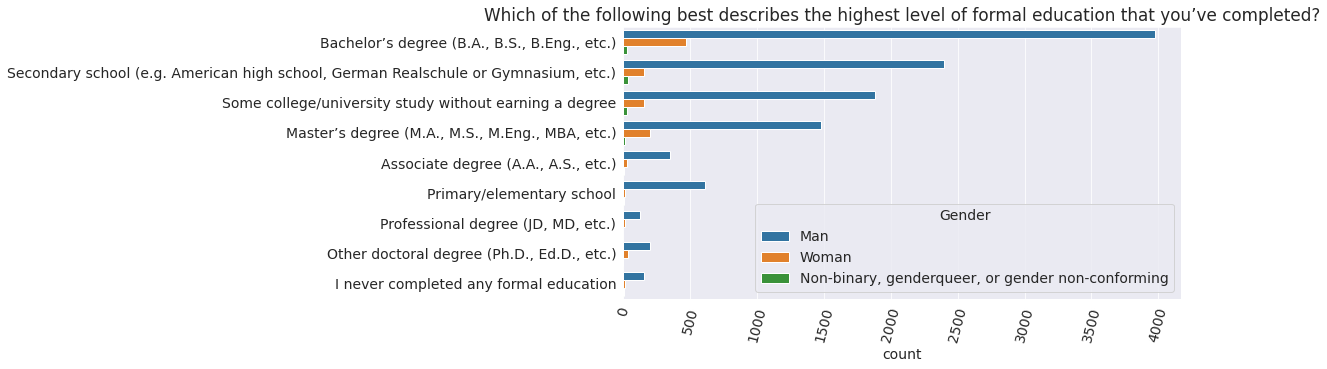

In [47]:
sns.countplot(y=new_survey.EdLevel,hue=new_survey['Gender'])
plt.xticks(rotation=75);
plt.title(new_scheme['EdLevel'])
plt.ylabel(None);

In [48]:
new_scheme.UndergradMajor

'What was your primary field of study?'

In [49]:
undergrad  = new_survey.UndergradMajor.value_counts()*100/new_survey.UndergradMajor.count()
undergrad

Computer science, computer engineering, or software engineering                   60.289004
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.636040
Information systems, information technology, or system administration              8.144657
Web development or web design                                                      4.798702
A natural science (such as biology, chemistry, physics, etc.)                      3.809597
Mathematics or statistics                                                          3.585503
A business discipline (such as accounting, finance, marketing, etc.)               2.944131
A social science (such as anthropology, psychology, political science, etc.)       1.800479
A humanities discipline (such as literature, history, philosophy, etc.)            1.599567
I never declared a major                                                           1.329109
Fine arts or performing arts (such as graphic design, music, studio art, etc.)  

Text(0.5, 0, 'Percentage')

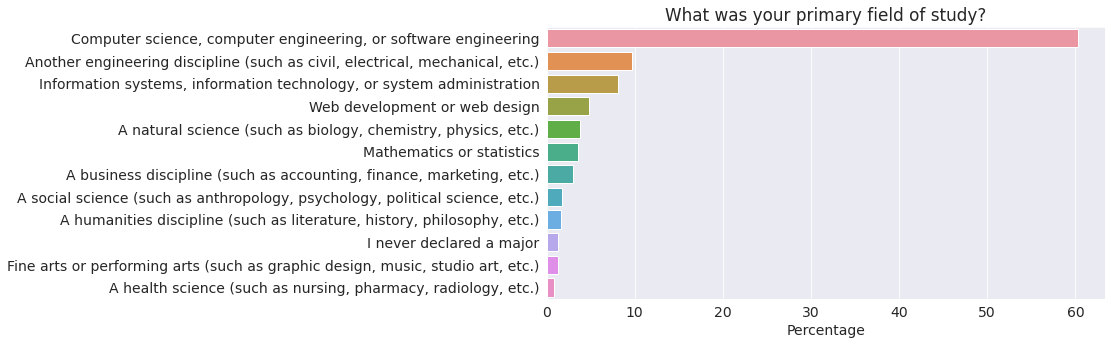

In [50]:
sns.barplot(x=undergrad,y=undergrad.index)
plt.title(new_scheme.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage')

In [51]:
new_scheme.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

## Employment  

In [52]:
new_scheme.Employment

'Which of the following best describes your current employment status?'

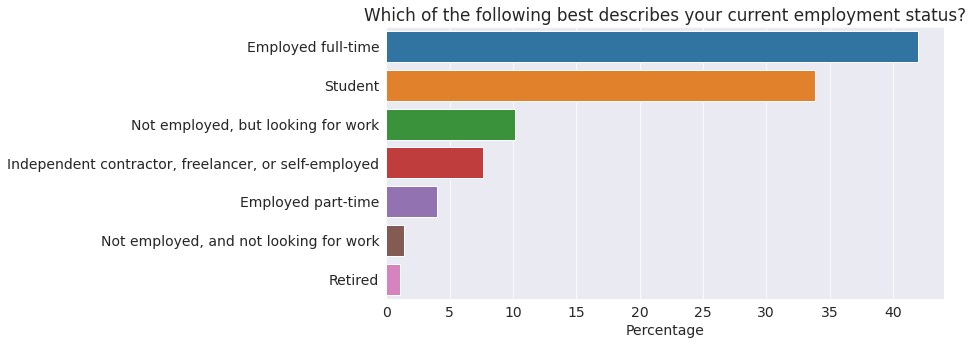

In [53]:
percen = new_survey.Employment.value_counts()*100/new_survey.Employment.count()
percen
sns.barplot(x=percen,y=percen.index)
plt.title(new_scheme.Employment)
plt.xlabel('Percentage');
plt.ylabel(None);

- It appears that close to 10% of respondents are employed part time or as freelancer

In [54]:
percen

Employed full-time                                      41.948319
Student                                                 33.815749
Not employed, but looking for work                      10.161340
Independent contractor, freelancer, or self-employed     7.621005
Employed part-time                                       4.009444
Not employed, and not looking for work                   1.390407
Retired                                                  1.053736
Name: Employment, dtype: float64

In [55]:
new_scheme.DevType

'Which of the following describe you? Please select all that apply.'

In [56]:
new_survey.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                             743
Developer, back-end                                                                                                                                                                                               536
Developer, front-end                                                                                                                                                                                              329
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                    304
Developer, mobile                                                                                                                               

In [57]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [58]:
dev_type_df = split_multicolumn(new_survey.DevType)
dev_type_df

,"Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,Database administrator,Engineering manager,Product manager,...,Data scientist or machine learning specialist,"Engineer, data","Developer, desktop or enterprise applications","Developer, embedded applications or devices",Educator,Senior executive/VP,"Developer, game or graphics","Engineer, site reliability",Scientist,Marketing or sales professional
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyasky/python-eda-stackoverflow-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyasky/python-eda-stackoverflow-survey


'https://jovian.com/shreyasky/python-eda-stackoverflow-survey'

In [66]:
dev_type_df.sum().sort_values(ascending=False).head(20)

Developer, back-end                              4286
Developer, full-stack                            4152
Developer, front-end                             3199
Developer, desktop or enterprise applications    1864
Developer, mobile                                1843
Designer                                         1340
System administrator                             1012
Database administrator                           1006
Academic researcher                               914
Data or business analyst                          883
Data scientist or machine learning specialist     863
Developer, embedded applications or devices       860
DevOps specialist                                 697
Engineer, data                                    690
Educator                                          676
Developer, game or graphics                       673
Developer, QA or test                             643
Product manager                                   551
Engineering manager         

In [67]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyasky/python-eda-stackoverflow-survey" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyasky/python-eda-stackoverflow-survey


'https://jovian.com/shreyasky/python-eda-stackoverflow-survey'